In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import KID_S21 as S21
import pandas as pd
import pickle
from copy import copy
import glob 

import matplotlibcolors
plt.style.use('matplotlibrc')

%matplotlib widget

In [7]:
dir  = r"C:\Users\wilbertr\ownCloud2\PhD\PhD\PythonProjects\sonnet\LT402 Design/"
chip = 'LT402_32x32_4-8GHz'
path = dir + chip + '/'
with open('LT402chip6_master.pkl', 'rb') as f:
    master = pickle.load(f)
kid_id_board = np.load(path + chip + '_id.npy')
f0_mapped = master['trimmeasured']['f0']

In [2]:
# dir = r'Z:\KIDonSun\experiments\Entropy ADR\LT402chip6_BF_20250930_nibble\S21_25mK\Power/'
# dir = r'Z:\KIDonSun\experiments\Entropy ADR\LT402chip6_BF_20250930_nibble\S21_100mK\Power/'
dir = r'Z:\KIDonSun\experiments\Entropy ADR\LT402chip6_BF_20251028\S21\Power/'
df = S21.loop_over_S21_files(dir, kid=None, pread=116, plot=False)
display(df)
with open('LT402chip6nibble_Qs_dark.pkl', 'wb') as f:
    pickle.dump(df, f)

c:\Users\wilbertr\ownCloud2\PhD\PhD\PythonProjects\spatial-mapping\NEW_S21_SCRIPT\KID_S21.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_results = pd.concat([df_results, new_entry], ignore_index=True)


,KID,Power,Temperature,f0,f0_std,Ql,Ql_std,Qc,Qc_std,Qi,Qi_std,Pint,redchisqr,phi
0,1,-116.0,0.024940,4.076475,1.092306e-07,41532.641648,89.037357,39446.295913,169.623895,-785252.820510,50180.934868,-74.563770,0.000028,0.265252
1,2,-116.0,0.024963,4.079549,1.145637e-07,46939.759531,119.140692,49963.154872,202.485445,775703.542127,48739.097721,-74.527180,0.000038,-0.293473
2,3,-116.0,0.024943,4.085663,1.128368e-07,55693.037330,165.406930,65619.243954,207.944728,368170.353637,6916.139659,-74.225793,0.000033,0.022448
3,4,-116.0,0.024953,4.090129,1.314088e-07,40081.252254,98.239551,47492.315088,122.617167,256852.694918,3760.959715,-75.678906,0.000030,-0.098598
4,5,-116.0,0.024940,4.093331,1.281476e-07,55390.265280,185.417904,59394.795196,284.729411,821542.985361,54696.428795,-73.840314,0.000050,-0.017052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,999,-116.0,0.024994,8.006784,4.815225e-07,33949.370685,123.551441,31816.631295,205.790783,-506463.478464,36086.448854,-75.381406,0.000155,0.318100
999,1000,-116.0,0.024989,8.011714,2.044271e-07,47372.852698,108.263814,52029.478484,156.799020,529307.041968,15970.885810,-74.623403,0.000051,-0.329978
1000,1001,-116.0,0.024993,8.053118,3.000527e-07,27772.225661,50.624740,29215.313694,75.205480,562248.640517,26499.324020,-76.755391,0.000043,-0.037628
1001,1002,-116.0,0.024990,8.063775,2.715363e-07,37531.673470,85.408604,35900.597431,155.720745,-826086.257122,59816.415954,-75.034557,0.000054,0.104340


In [3]:
# with open('LT402chip6nibble_Qs_100mK.pkl', 'rb') as f:
with open('LT402chip6nibble_Qs_dark.pkl', 'rb') as f:
    df = pickle.load(f)
display(df)

,KID,Power,Temperature,f0,f0_std,Ql,Ql_std,Qc,Qc_std,Qi,Qi_std,Pint,redchisqr,phi
0,1,-116.0,0.024940,4.076475,1.092306e-07,41532.641648,89.037357,39446.295913,169.623895,-785252.820510,50180.934868,-74.563770,0.000028,0.265252
1,2,-116.0,0.024963,4.079549,1.145637e-07,46939.759531,119.140692,49963.154872,202.485445,775703.542127,48739.097721,-74.527180,0.000038,-0.293473
2,3,-116.0,0.024943,4.085663,1.128368e-07,55693.037330,165.406930,65619.243954,207.944728,368170.353637,6916.139659,-74.225793,0.000033,0.022448
3,4,-116.0,0.024953,4.090129,1.314088e-07,40081.252254,98.239551,47492.315088,122.617167,256852.694918,3760.959715,-75.678906,0.000030,-0.098598
4,5,-116.0,0.024940,4.093331,1.281476e-07,55390.265280,185.417904,59394.795196,284.729411,821542.985361,54696.428795,-73.840314,0.000050,-0.017052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,999,-116.0,0.024994,8.006784,4.815225e-07,33949.370685,123.551441,31816.631295,205.790783,-506463.478464,36086.448854,-75.381406,0.000155,0.318100
999,1000,-116.0,0.024989,8.011714,2.044271e-07,47372.852698,108.263814,52029.478484,156.799020,529307.041968,15970.885810,-74.623403,0.000051,-0.329978
1000,1001,-116.0,0.024993,8.053118,3.000527e-07,27772.225661,50.624740,29215.313694,75.205480,562248.640517,26499.324020,-76.755391,0.000043,-0.037628
1001,1002,-116.0,0.024990,8.063775,2.715363e-07,37531.673470,85.408604,35900.597431,155.720745,-826086.257122,59816.415954,-75.034557,0.000054,0.104340


filtered: 506 / 1003


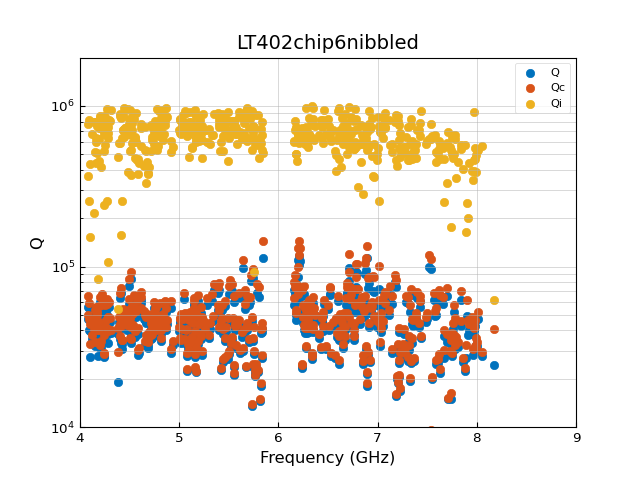

In [6]:
f0_Q = df['f0']
Ql = df['Ql']
Qc = df['Qc']
Qi = df['Qi']
phi = df['phi']

min_df = 0.002
df0s = np.asarray(f0_Q)[1:] - np.asarray(f0_Q)[:-1]
too_close = df0s < min_df
too_close_mask = np.hstack((False, too_close)) + np.hstack((too_close, False))

Qi_mask = (Qi > 1e4) & (Qi < 1e6)
Qc_mask = (Qc < 1.5e5) & (Qc > 0)
mask = Qi_mask & Qc_mask & ~too_close_mask
# mask = np.ones(len(df), dtype=bool)  # all
df_filtered = copy(df)
df_filtered[~mask] = np.nan
f0_Q = df_filtered['f0']
Ql = df_filtered['Ql']
Qc = df_filtered['Qc']
Qi = df_filtered['Qi']
phi = df_filtered['phi']
print('filtered:', np.sum(mask==False), '/', len(mask))
fig, ax = plt.subplots()
ax.set_title('LT402chip6nibbled')
ax.set_yscale('log')
ax.scatter(f0_Q, Ql, label='Q')
ax.scatter(f0_Q, Qc, label='Qc')
ax.scatter(f0_Q, Qi, label='Qi')
ax.set_xlim(4,9)
ax.set_xlabel('Frequency (GHz)')    
ax.set_ylim(1e4,2e6)
ax.set_ylabel('Q')
ax.legend()

In [8]:
nr = len(f0_mapped)
f0_dark = f0_Q
idxs = np.empty(nr)
idxs[:] = np.nan
for id, f0 in enumerate(f0_mapped):
    if ~np.isnan(f0):
        closest =  np.nanargmin(np.abs(f0 - f0_dark))
        if ~np.isnan(f0_dark[closest]):
            tone = f0_dark[closest]
            if closest in idxs:
                idx_location = np.where(idxs == closest)[0]
                if len(idx_location) == 1:
                    prev_id = idx_location[0]
                    prev_f0 = f0_mapped[prev_id]
                    curr_diff = np.abs(f0 - tone)
                    prev_diff = np.abs(prev_f0 - tone)
                    if curr_diff < prev_diff:
                        idxs[prev_id] = np.nan
                    else:
                        closest = np.nan
                else:
                    print('more than one match')
                    closest = np.nan
            else:
                pass
        else:
            closest = np.nan
    else:
        closest = np.nan
    idxs[id] = closest
print(idxs)


[  nan   nan   nan ...  974.  990. 1000.]


In [9]:
df_sorted = pd.DataFrame(np.nan, index=np.arange(nr), columns=df_filtered.columns)
for i, idx in enumerate(idxs):
    if ~np.isnan(idx):
        df_sorted.iloc[i] = df_filtered.iloc[int(idx)]
    else:
        pass

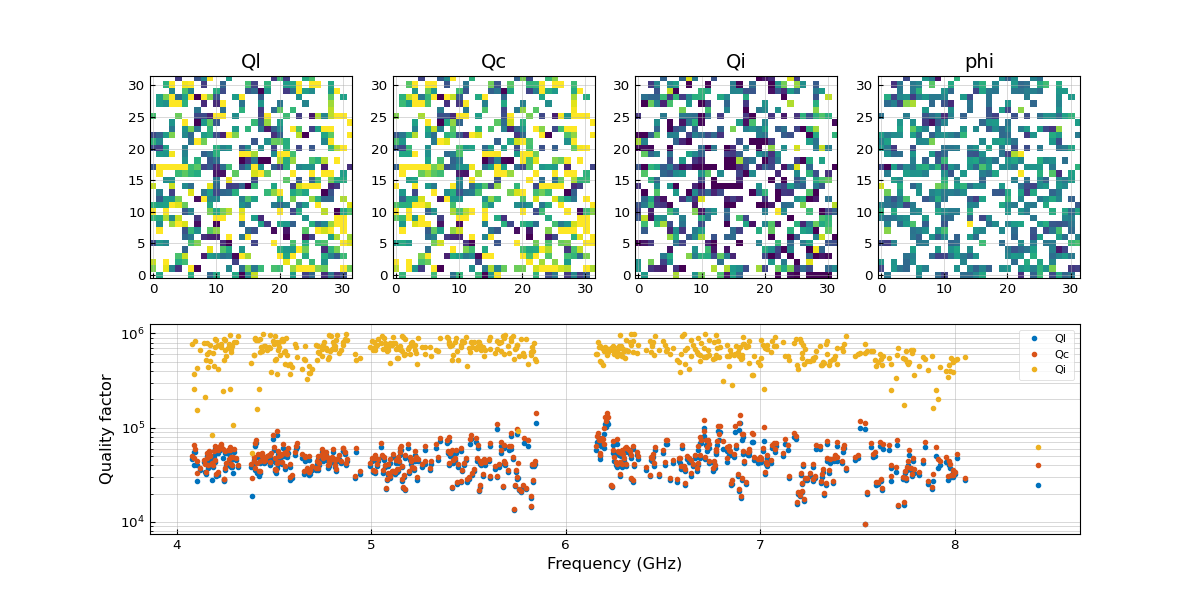

In [13]:
fig, axes = plt.subplot_mosaic('abcd;eeee', figsize=(12,6))
Ql = np.asarray(df_sorted['Ql'])
Qi = np.asarray(df_sorted['Qi'])
Qc = np.asarray(df_sorted['Qc'])
phi = np.asarray(df_sorted['phi'])
ax = axes['a']
ax.imshow(Ql[kid_id_board], vmin=2e4, vmax=6e4, origin='lower')
ax.set_title('Ql')
ax = axes['b']
ax.imshow(Qc[kid_id_board], vmin=2e4, vmax=6e4, origin='lower')
ax.set_title('Qc')
ax = axes['c']
ax.imshow(Qi[kid_id_board], vmin=5e5, vmax=1e6, origin='lower')
ax.set_title('Qi')
ax = axes['d']
ax.imshow(phi[kid_id_board], origin='lower')
ax.set_title('phi')
ax = axes['e']
ax.plot(f0_mapped, Ql, '.', label='Ql')
ax.plot(f0_mapped, Qc, '.', label='Qc')
ax.plot(f0_mapped, Qi, '.', label='Qi')
ax.set_yscale('log')
ax.set_xlabel('Frequency (GHz)')
ax.set_ylabel('Quality factor')
ax.legend()


In [26]:
dir = r'Z:\KIDonSun\experiments\Entropy ADR\LT402chip6_BF_20251028\S21\2D/'
dir = r'Z:\KIDonSun\experiments\Entropy ADR\LT402chip6_BF_20250930_nibble\S21_25mK\2D/'
df = S21.loop_over_S21_files(dir, kid=None, pread=116, plot=False)
display(df)


c:\Users\wilbertr\ownCloud2\PhD\PhD\PythonProjects\spatial-mapping\NEW_S21_SCRIPT\KID_S21.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_results = pd.concat([df_results, new_entry], ignore_index=True)
c:\Users\wilbertr\ownCloud2\PhD\PhD\PythonProjects\spatial-mapping\NEW_S21_SCRIPT\KID_S21.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_results = pd.concat([df_results, new_entry], ignore_index=True)
c:\Users\wilbertr\ownCloud2\PhD\PhD\PythonProjects\spatial-mapping\NEW_S21_SCRIP

,KID,Power,Temperature,f0,f0_std,Ql,Ql_std,Qc,Qc_std,Qi,Qi_std,Pint,redchisqr,phi
0,2,-116.0,0.025000,4.080235,1.171580e-07,32787.067583,57.083038,45379.557664,70.779300,118154.758465,564.632103,-77.226050,0.000024,-0.072720
1,2,-116.0,0.026252,4.080235,1.181846e-07,32920.658374,57.971533,45570.922914,71.879723,118592.364641,572.499366,-77.209007,0.000024,-0.067001
2,2,-116.0,0.031094,4.080235,1.223812e-07,32907.858608,59.935408,45768.035786,74.487153,117115.653199,575.950861,-77.231129,0.000026,-0.068146
3,2,-116.0,0.035799,4.080232,1.214400e-07,32542.334569,58.161233,45391.161441,72.376256,114962.585825,549.962878,-77.292238,0.000025,-0.067089
4,2,-116.0,0.040515,4.080233,1.130211e-07,32658.407749,52.959632,45774.375746,65.999590,113976.965170,469.464694,-77.297823,0.000025,-0.069997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,996,-116.0,0.139695,7.992574,1.597601e-06,12513.493973,56.530015,36950.813090,140.825201,18921.215322,103.265263,-84.700167,0.000046,-0.196813
402,996,-116.0,0.144495,7.992430,2.143370e-06,10971.482636,58.262059,37433.731984,168.304037,15520.356378,95.608319,-85.898824,0.000048,-0.195762
403,996,-116.0,0.149340,7.992258,2.949879e-06,9522.250547,60.524021,38324.709311,206.702582,12670.358707,90.403359,-87.231495,0.000049,-0.195591
404,996,-116.0,0.154133,7.992038,4.335021e-06,8279.306188,67.402581,39743.787487,273.101722,10457.855082,93.276997,-88.604312,0.000056,-0.173753


In [27]:
with open('LT402chip6nibble_QsvT.pkl', 'wb') as f:
    pickle.dump(df, f)

,KID,Power,Temperature,f0,f0_std,Ql,Ql_std,Qc,Qc_std,Qi,Qi_std,Pint,redchisqr,phi
0,1,-116.0,0.024772,4.076485,1.064245e-07,41234.175177,83.863448,40185.554852,203.372049,-1.580189e+06,263814.310226,-74.707052,0.000035,0.268846
1,1,-116.0,0.029498,4.076486,1.061795e-07,41363.905189,84.161547,39415.169452,161.062575,-8.366272e+05,54422.055801,-74.595702,0.000033,0.265732
2,1,-116.0,0.034248,4.076483,1.077705e-07,41715.733848,86.703246,40228.820163,183.519362,-1.128630e+06,114428.521503,-74.610874,0.000035,0.258050
3,1,-116.0,0.038916,4.076482,1.166624e-07,41395.495856,92.378385,40111.256499,205.566982,-1.292925e+06,173349.157089,-74.665100,0.000041,0.263279
4,1,-116.0,0.043695,4.076483,1.027894e-07,41648.364178,82.614741,39966.444412,167.290216,-9.896649e+05,79392.115871,-74.596495,0.000031,0.260969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,1002,-116.0,0.147036,8.063188,2.868284e-06,14955.032768,146.802254,43247.487495,344.704446,2.286007e+04,278.184963,-83.835360,0.000109,0.117375
356,1002,-116.0,0.152072,8.062976,7.204226e-06,13904.750653,322.312618,50770.036278,963.528101,1.914931e+04,519.557536,-85.164309,0.000389,0.239674
357,1002,-116.0,0.156754,8.062768,1.048830e-05,13420.069416,441.330805,60053.964513,1612.593594,1.728203e+04,642.476749,-86.201820,0.000476,0.277595
358,1002,-116.0,0.161784,8.062491,1.518257e-05,13142.750941,617.357757,77002.088729,2901.623962,1.584763e+04,813.476970,-87.462798,0.000490,0.257530


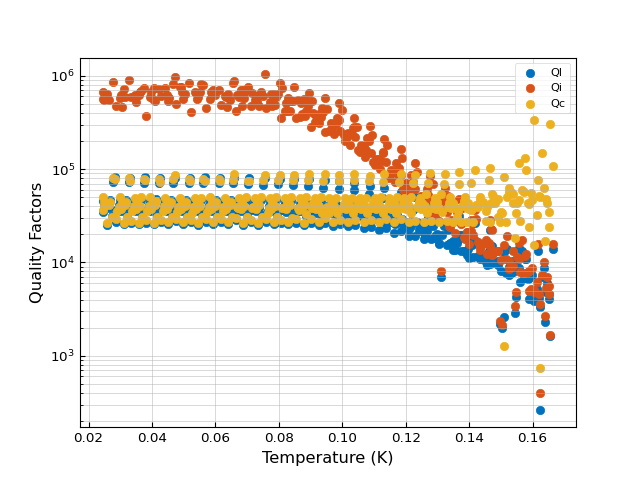

In [30]:
with open('LT402chip6nibble_QsvT_dark.pkl', 'rb') as f:
    df = pickle.load(f)
display(df)
fig, ax = plt.subplots()
temperatures = df['Temperature']
Ql = df['Ql']
Qc = df['Qc']
Qi = df['Qi']
ax.set_yscale('log')
ax.scatter(temperatures, Ql, label='Ql')
ax.scatter(temperatures, Qi, label='Qi')
ax.scatter(temperatures, Qc, label='Qc')
ax.set_xlabel('Temperature (K)')
ax.set_ylabel('Quality Factors')
ax.legend()

,KID,Power,Temperature,f0,f0_std,Ql,Ql_std,Qc,Qc_std,Qi,Qi_std,Pint,redchisqr,phi
0,2,-116.0,0.025000,4.080235,1.171580e-07,32787.067583,57.083038,45379.557664,70.779300,118154.758465,564.632103,-77.226050,0.000024,-0.072720
1,2,-116.0,0.026252,4.080235,1.181846e-07,32920.658374,57.971533,45570.922914,71.879723,118592.364641,572.499366,-77.209007,0.000024,-0.067001
2,2,-116.0,0.031094,4.080235,1.223812e-07,32907.858608,59.935408,45768.035786,74.487153,117115.653199,575.950861,-77.231129,0.000026,-0.068146
3,2,-116.0,0.035799,4.080232,1.214400e-07,32542.334569,58.161233,45391.161441,72.376256,114962.585825,549.962878,-77.292238,0.000025,-0.067089
4,2,-116.0,0.040515,4.080233,1.130211e-07,32658.407749,52.959632,45774.375746,65.999590,113976.965170,469.464694,-77.297823,0.000025,-0.069997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,996,-116.0,0.139695,7.992574,1.597601e-06,12513.493973,56.530015,36950.813090,140.825201,18921.215322,103.265263,-84.700167,0.000046,-0.196813
402,996,-116.0,0.144495,7.992430,2.143370e-06,10971.482636,58.262059,37433.731984,168.304037,15520.356378,95.608319,-85.898824,0.000048,-0.195762
403,996,-116.0,0.149340,7.992258,2.949879e-06,9522.250547,60.524021,38324.709311,206.702582,12670.358707,90.403359,-87.231495,0.000049,-0.195591
404,996,-116.0,0.154133,7.992038,4.335021e-06,8279.306188,67.402581,39743.787487,273.101722,10457.855082,93.276997,-88.604312,0.000056,-0.173753


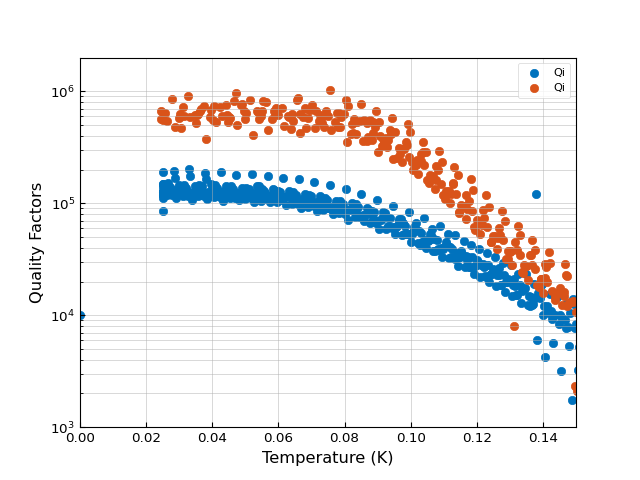

In [34]:
with open('LT402chip6nibble_QsvT.pkl', 'rb') as f:
    df = pickle.load(f)
with open('LT402chip6nibble_QsvT_dark.pkl', 'rb') as f:
    dfdark = pickle.load(f)
display(df)
fig, ax = plt.subplots()
T = df['Temperature']
T_dark = dfdark['Temperature']
Qi = df['Qi']
Qi_dark = dfdark['Qi']
ax.set_yscale('log')
ax.scatter(T, Qi, label='Qi')
ax.scatter(T_dark, Qi_dark, label='Qi')
ax.set_xlabel('Temperature (K)')
ax.set_ylabel('Quality Factors')
ax.set_xlim(0,.15)
ax.set_ylim(1e3, 2e6)
ax.legend()